In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Setting the path
path = r'C:\Users\Bhati\OneDrive\Desktop\CF\Data Analytics Immersion\Achievement 6\25-May-2023 Germany Rent Analysis'

In [3]:
# Importing the Data
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'Cleaned_Germany_Rent_Data.csv'))

In [4]:
# Checking the data
df.head()

,Unnamed: 0,State,Maintenance_fee,Heating_type,TV_offer,Newly_built,Balcony,Picture_count,Price_trend,Internet_speed,...,Flat_type,Pincode,Rooms,Floor,noRoomsRange,Garden,livingSpaceRange,District,City/town,date
0,0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,...,ground_floor,44269,4.0,1.0,4,True,4,Dortmund,Schüren,May19
1,2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,...,apartment,1097,3.0,3.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Oct19
2,4,Bremen,138.0,self_contained_central_heating,NaN,False,True,19,2.46,NaN,...,apartment,28213,3.0,1.0,3,False,4,Bremen,Neu_Schwachhausen,Feb20
3,8,Baden_Württemberg,110.0,oil_heating,ONE_YEAR_FREE,False,False,5,3.77,40.0,...,roof_storey,79211,2.0,2.0,2,False,2,Emmendingen_Kreis,Denzlingen,Feb20
4,10,Sachsen,88.0,NaN,ONE_YEAR_FREE,False,True,11,0.21,40.0,...,apartment,9130,2.0,3.0,2,False,1,Chemnitz,Sonnenberg,Oct19


In [5]:
# Size of dataset
df.shape

(148833, 33)

In [6]:
# Checking the percentage of missing values in the dataset
percentage = (df.isnull().sum()/len(df))*100
percentage.sort_values()

Unnamed: 0               0.000000
District                 0.000000
livingSpaceRange         0.000000
Garden                   0.000000
noRoomsRange             0.000000
Floor                    0.000000
Rooms                    0.000000
Pincode                  0.000000
baseRentRange            0.000000
Lift                     0.000000
street                   0.000000
City                     0.000000
Area(m2)                 0.000000
City/town                0.000000
yearConstructedRange     0.000000
Base_rent                0.000000
Kitchen                  0.000000
State                    0.000000
Newly_built              0.000000
Balcony                  0.000000
Cellar                   0.000000
Picture_count            0.000000
Total_Rent               0.000000
Year_constructed         0.000000
date                     0.000000
Maintenance_fee          0.723630
Price_trend              0.756553
Heating_type            11.790396
TV_offer                12.018840
Internet_speed

keeping the columns that have missing values for now as they might be required further in the analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148833 entries, 0 to 148832
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            148833 non-null  int64  
 1   State                 148833 non-null  object 
 2   Maintenance_fee       147756 non-null  float64
 3   Heating_type          131285 non-null  object 
 4   TV_offer              130945 non-null  object 
 5   Newly_built           148833 non-null  bool   
 6   Balcony               148833 non-null  bool   
 7   Picture_count         148833 non-null  int64  
 8   Price_trend           147707 non-null  float64
 9   Internet_speed        130592 non-null  float64
 10  Total_Rent            148833 non-null  float64
 11  Year_constructed      148833 non-null  float64
 12  Energy_Source         130067 non-null  object 
 13  Kitchen               148833 non-null  bool   
 14  Cellar                148833 non-null  bool   
 15  

In [8]:
# Checking columns with mixed datatypes
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

Heating_type
TV_offer
Energy_Source
House_condition
Flat_type


In [9]:
# Changing the data type to object
df[['Heating_type', 'TV_offer', 'Energy_Source','House_condition','Flat_type']] = df[['Heating_type', 'TV_offer', 'Energy_Source','House_condition','Flat_type']].astype(object)

In [10]:
# Correlation matrix - excluding the boolean columns (bool) and object columns (object) from the calculation 
# since correlation is not meaningful for these data types.
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_data = df[numeric_columns]
correlation_matrix = numeric_data.corr()
correlation_matrix

,Unnamed: 0,Maintenance_fee,Picture_count,Price_trend,Internet_speed,Total_Rent,Year_constructed,yearConstructedRange,Base_rent,Area(m2),baseRentRange,Pincode,Rooms,Floor,noRoomsRange,livingSpaceRange
Unnamed: 0,1.000000,-0.000161,0.008317,0.037832,0.007876,0.003735,0.012566,0.010698,0.020966,0.009746,0.032831,0.029113,0.001770,-0.014186,-0.000439,0.011672
Maintenance_fee,-0.000161,1.000000,0.046548,0.051909,0.015709,0.002670,0.031628,0.054534,0.135586,0.150575,0.128940,0.033390,0.098309,0.002317,0.097301,0.142749
Picture_count,0.008317,0.046548,1.000000,0.129674,0.002995,0.006500,0.015629,0.088106,0.301147,0.291733,0.315336,0.040974,0.181843,0.002362,0.176791,0.288021
Price_trend,0.037832,0.051909,0.129674,1.000000,0.037224,0.007548,0.159796,0.216906,0.456245,0.188979,0.536451,0.250623,0.037849,0.019137,0.026420,0.190738
Internet_speed,0.007876,0.015709,0.002995,0.037224,1.000000,0.002124,-0.035638,-0.020463,0.013682,-0.007285,0.022328,-0.025153,0.001430,0.002852,-0.001833,-0.007754
Total_Rent,0.003735,0.002670,0.006500,0.007548,0.002124,1.000000,0.006079,0.009122,0.016471,0.014671,0.015191,0.006586,0.007142,0.000239,0.007149,0.015127
Year_constructed,0.012566,0.031628,0.015629,0.159796,-0.035638,0.006079,1.000000,0.865440,0.218612,0.098680,0.268954,0.241798,0.048396,0.035689,0.046288,0.107214
yearConstructedRange,0.010698,0.054534,0.088106,0.216906,-0.020463,0.009122,0.865440,1.000000,0.367250,0.213355,0.429739,0.205461,0.071830,-0.018510,0.073106,0.225173
Base_rent,0.020966,0.135586,0.301147,0.456245,0.013682,0.016471,0.218612,0.367250,1.000000,0.702629,0.851979,0.278623,0.406211,0.023501,0.399456,0.660819
Area(m2),0.009746,0.150575,0.291733,0.188979,-0.007285,0.014671,0.098680,0.213355,0.702629,1.000000,0.703013,0.164397,0.748161,-0.014181,0.741154,0.959337


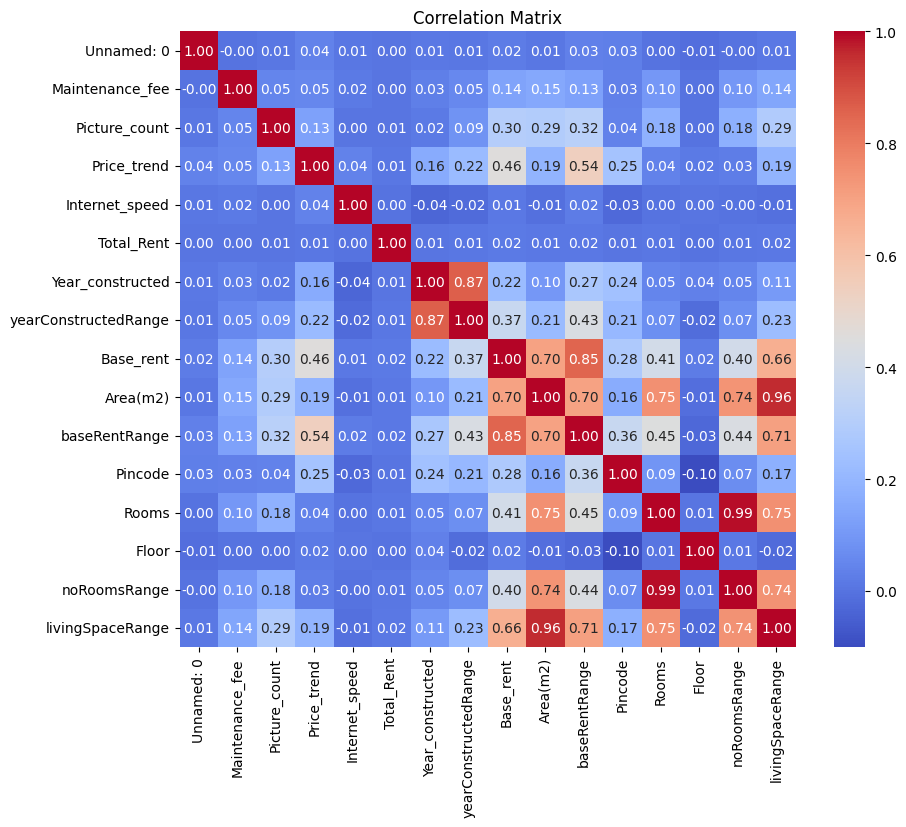

In [11]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [12]:
# Checking baseRentrange
rent_ranges = df.groupby('baseRentRange')['Base_rent'].agg(['min', 'max'])

for baseRentRange, (range_min, range_max) in rent_ranges.iterrows():
    print(f"Range of 'Base_rent' for baseRentRange {baseRentRange}: {range_min} to {range_max}")

Range of 'Base_rent' for baseRentRange 1: 0.0 to 300.98
Range of 'Base_rent' for baseRentRange 2: 301.0 to 400.92
Range of 'Base_rent' for baseRentRange 3: 401.0 to 500.94
Range of 'Base_rent' for baseRentRange 4: 501.0 to 600.92
Range of 'Base_rent' for baseRentRange 5: 601.0 to 800.72
Range of 'Base_rent' for baseRentRange 6: 801.0 to 1000.96
Range of 'Base_rent' for baseRentRange 7: 1001.0 to 1500.77
Range of 'Base_rent' for baseRentRange 8: 1501.0 to 2000.0
Range of 'Base_rent' for baseRentRange 9: 2005.0 to 30990.0


In [13]:
# Checking livingSpaceRange
Area_ranges = df.groupby('livingSpaceRange')['Area(m2)'].agg(['min', 'max'])

for livingSpaceRange, (range_min, range_max) in Area_ranges.iterrows():
    print(f"Range of 'Area(m2)' for LivingSpaceRAnge {livingSpaceRange}: {range_min} to {range_max}")

Range of 'Area(m2)' for LivingSpaceRAnge 1: 0.0 to 40.99
Range of 'Area(m2)' for LivingSpaceRAnge 2: 41.0 to 60.99
Range of 'Area(m2)' for LivingSpaceRAnge 3: 61.0 to 80.99
Range of 'Area(m2)' for LivingSpaceRAnge 4: 81.0 to 100.99
Range of 'Area(m2)' for LivingSpaceRAnge 5: 101.0 to 120.99
Range of 'Area(m2)' for LivingSpaceRAnge 6: 121.0 to 150.9
Range of 'Area(m2)' for LivingSpaceRAnge 7: 151.0 to 482.0


In [14]:
# Checking yearConstructedRange
Year_ranges = df.groupby('yearConstructedRange')['Year_constructed'].agg(['min', 'max'])

for yearConstructedRange, (range_min, range_max) in Year_ranges.iterrows():
    print(f"Range of 'Year_Constructed' for yearConstructedRange {yearConstructedRange}: {range_min} to {range_max}")

Range of 'Year_Constructed' for yearConstructedRange 1.0: 1803.0 to 1950.0
Range of 'Year_Constructed' for yearConstructedRange 2.0: 1951.0 to 1970.0
Range of 'Year_Constructed' for yearConstructedRange 3.0: 1971.0 to 1980.0
Range of 'Year_Constructed' for yearConstructedRange 4.0: 1981.0 to 1990.0
Range of 'Year_Constructed' for yearConstructedRange 5.0: 1991.0 to 2000.0
Range of 'Year_Constructed' for yearConstructedRange 6.0: 2001.0 to 2005.0
Range of 'Year_Constructed' for yearConstructedRange 7.0: 2006.0 to 2010.0
Range of 'Year_Constructed' for yearConstructedRange 8.0: 2011.0 to 2015.0
Range of 'Year_Constructed' for yearConstructedRange 9.0: 2016.0 to 2022.0


In [15]:
# Checking Roomsrange
Rooms_ranges = df.groupby('noRoomsRange')['Rooms'].agg(['min', 'max'])

for noRoomsRange, (range_min, range_max) in Rooms_ranges.iterrows():
    print(f"Range of 'Rooms' for RoomsRange {noRoomsRange}: {range_min} to {range_max}")

Range of 'Rooms' for RoomsRange 1: 1.0 to 1.5
Range of 'Rooms' for RoomsRange 2: 2.0 to 2.9
Range of 'Rooms' for RoomsRange 3: 3.0 to 3.5
Range of 'Rooms' for RoomsRange 4: 4.0 to 4.5
Range of 'Rooms' for RoomsRange 5: 5.0 to 5.5


In [16]:
unique_values = df['Rooms'].unique().tolist()

In [17]:
unique_values

[4.0,
 3.0,
 2.0,
 1.0,
 5.0,
 2.5,
 1.5,
 4.5,
 3.5,
 5.5,
 2.1,
 2.2,
 3.1,
 3.4,
 1.1,
 2.9,
 4.2,
 2.3,
 2.7,
 1.25]

In [18]:
filterd = df[df['Rooms'].isin([2.1, 2.2, 3.1, 3.4, 1.1, 2.9, 4.2, 2.3, 2.7, 1.25])]

In [19]:
filterd.shape

(87, 33)

Removing values of rooms like 2.1, 3.4 etc. as it does not make sense

In [20]:
df_new = df[df['Rooms'].isin([1.0,2.0,3.0,4.0,5.0,1.5,2.5,3.5,4.5,5.5])]

In [21]:
df_new.shape

(148746, 33)

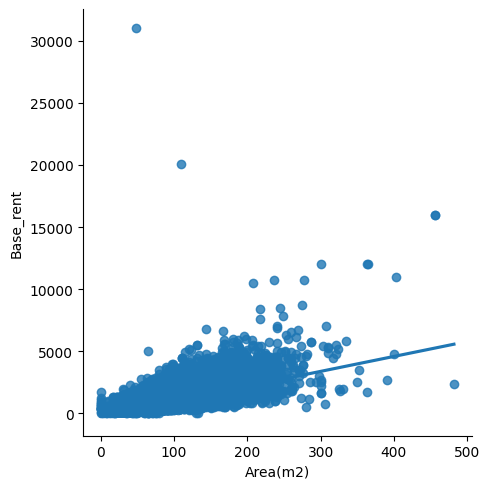

In [22]:
# Create a scatterplot for the "Area" and "Base_rent" columns in seaborn
Area_Rent = sns.lmplot(x = 'Area(m2)', y = 'Base_rent', data = df_new)

Base Rent and Area(m2) does have a positive linear relationship

In [23]:
# Exporting Visualization
Area_Rent.figure.savefig(os.path.join(path, '04 Analysis','Area_Rent.png'))

In [24]:
# Creating Subset for pair plot
sub = df_new[['Base_rent', 'Area(m2)', 'Rooms', 'Year_constructed']]

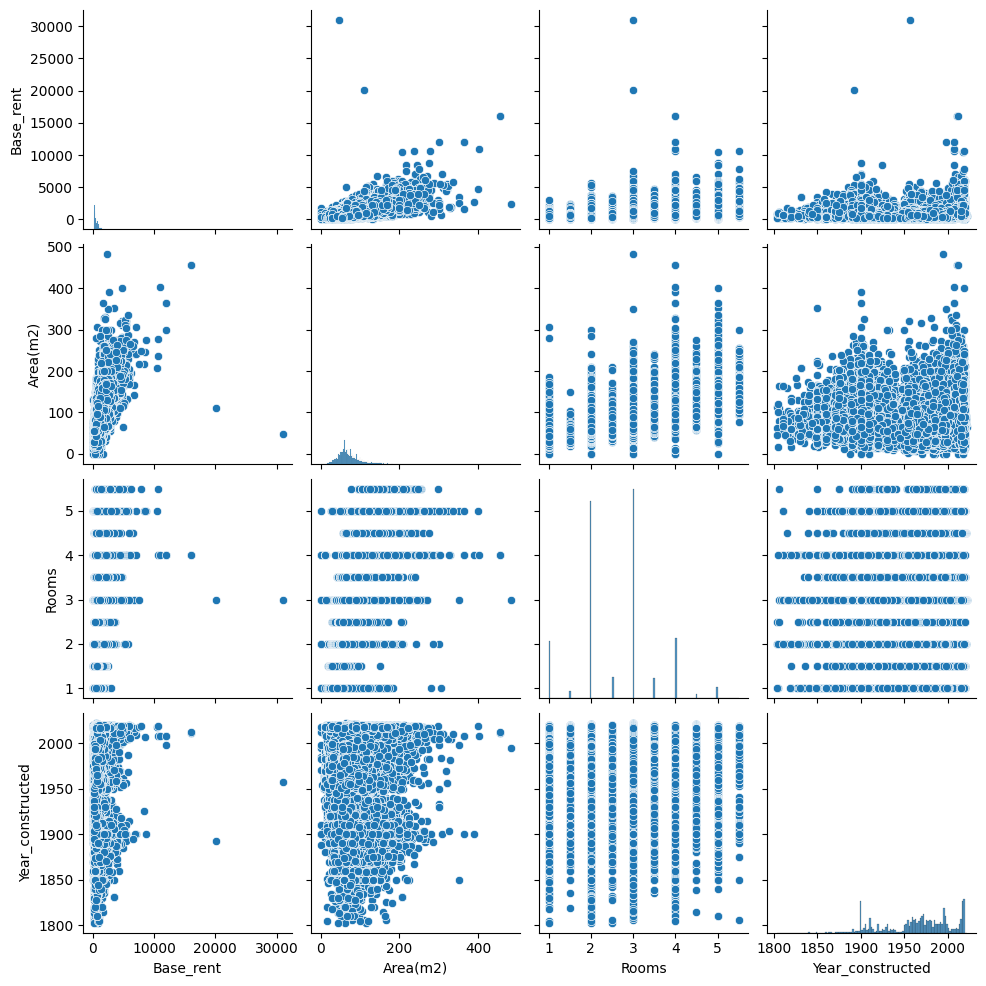

In [25]:
# Create a pair plot 
g = sns.pairplot(sub)

In [26]:
# Checking for extremely high monthly rents data
sub2 = df_new[(df_new['Base_rent'] > 4000)]

In [27]:
sub2.shape

(189, 33)

In [28]:
# Excluding rows with rents greater than 4000 as its extremely high and not relevant for my analysis
df_new2 = df_new[df_new['Base_rent']<4000]

In [29]:
df_new2.shape

(148550, 33)

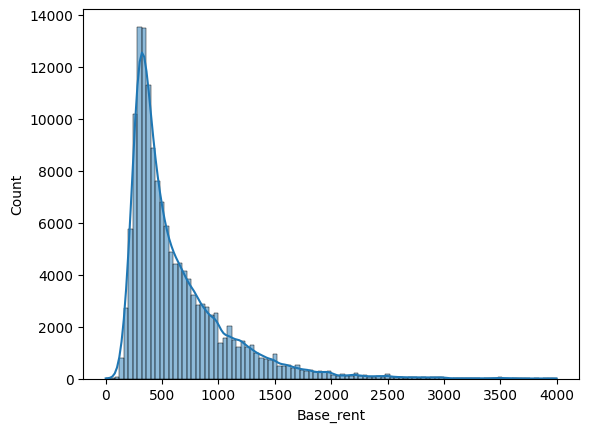

In [30]:
Hist_Rent = sns.histplot(df_new2['Base_rent'], bins = 100, kde = True)

In [31]:
# Exporting Visualization
Hist_Rent.figure.savefig(os.path.join(path, '04 Analysis','Hist_Rent.png'))

In [32]:
df_new2.loc[df_new2['Base_rent'] < 500, 'Rent category'] = 'Low Rent'

C:\Users\Bhati\AppData\Local\Temp\ipykernel_14144\2860751112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2.loc[df_new2['Base_rent'] < 500, 'Rent category'] = 'Low Rent'


In [33]:
df_new2.loc[(df_new2['Base_rent'] >= 500) & (df_new2['Base_rent'] < 1500) , 'Rent category'] = 'Normal Rent'

In [34]:
df_new2.loc[df_new2['Base_rent'] >= 1500, 'Rent category'] = 'High Rent'

In [35]:
df_new2['Rent category'].value_counts(dropna = False)

Low Rent       78266
Normal Rent    62727
High Rent       7557
Name: Rent category, dtype: int64

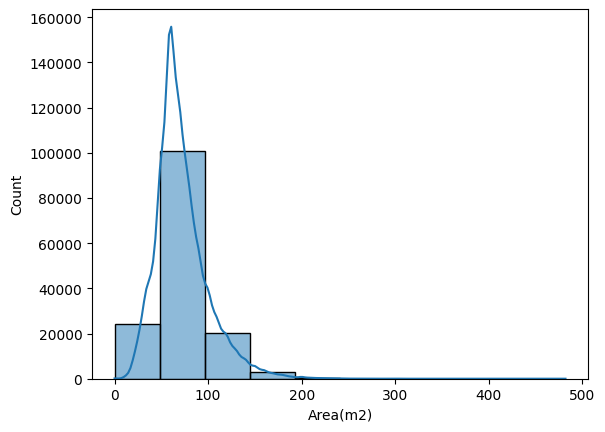

In [36]:
hist_area = sns.histplot(df_new2['Area(m2)'], bins = 10, kde = True)

In [37]:
# Exporting Visualization
hist_area.figure.savefig(os.path.join(path, '04 Analysis','Hist_Area.png'))

In [38]:
df_new2.loc[df_new2['Area(m2)'] < 50, 'Apartment category'] = 'Small Apartment'

C:\Users\Bhati\AppData\Local\Temp\ipykernel_14144\2220777793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2.loc[df_new2['Area(m2)'] < 50, 'Apartment category'] = 'Small Apartment'


In [39]:
df_new2.loc[(df_new2['Area(m2)'] >= 50) & (df_new2['Area(m2)'] < 100) , 'Apartment category'] = 'Medium Apartment'

In [40]:
df_new2.loc[df_new2['Area(m2)'] >= 100, 'Apartment category'] = 'Big Apartment'

In [41]:
df_new2['Apartment category'].value_counts(dropna = False)

Medium Apartment    100108
Small Apartment      27178
Big Apartment        21264
Name: Apartment category, dtype: int64

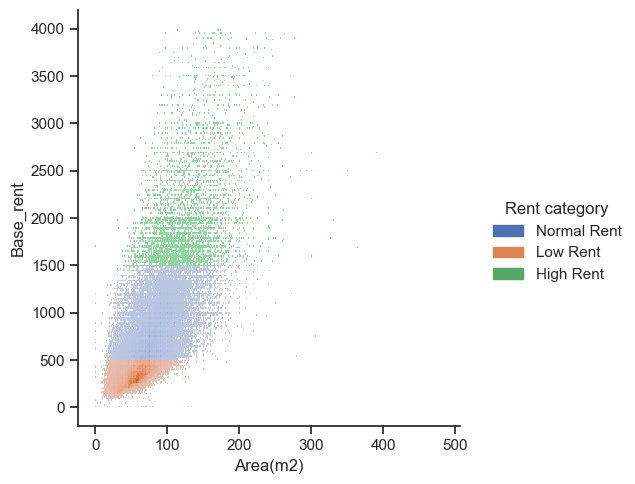

In [42]:
# Creating a categorical plot in seaborn using the rent categories created before
sns.set(style="ticks")
rent_cat = sns.displot(x="Area(m2)", y="Base_rent", hue="Rent category", data=df_new2)

In [43]:
# Exporting Visualization
rent_cat.figure.savefig(os.path.join(path, '04 Analysis','Rent_Category.png'))

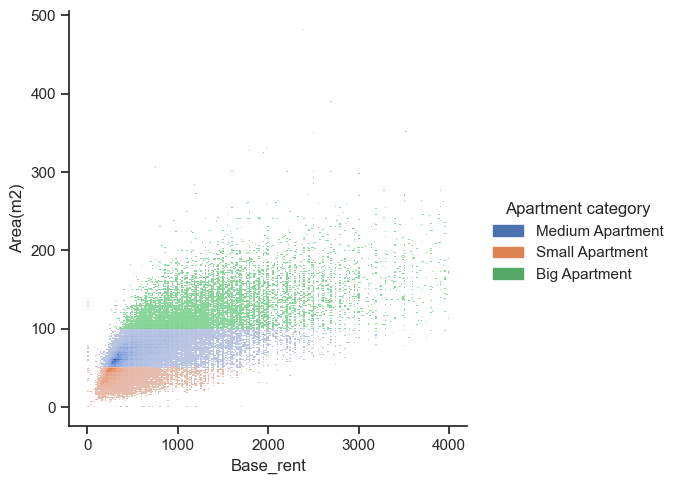

In [44]:
# Creating a categorical plot in seaborn using the Apartment categories created before
sns.set(style="ticks")
Apart_Cat = sns.displot(x="Base_rent", y="Area(m2)", hue="Apartment category", data=df_new2)

In [45]:
# Exporting Visualization
Apart_Cat.figure.savefig(os.path.join(path, '04 Analysis','Apartment_Category.png'))


From both of the above histograms, I would be exploring how area and base_rent is correlated; for example: small apartment does fall in all three categories i.e. Normal, low and high rent.

In [51]:
Crosstab = pd.crosstab(df_new2['Rent category'], df_new2['Apartment category'])

In [52]:
Crosstab

Apartment category,Big Apartment,Medium Apartment,Small Apartment
Rent category,,,
High Rent,5612,1898,47
Low Rent,366,54612,23288
Normal Rent,15286,43598,3843


In [53]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148550 entries, 0 to 148832
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            148550 non-null  int64  
 1   State                 148550 non-null  object 
 2   Maintenance_fee       147476 non-null  float64
 3   Heating_type          131076 non-null  object 
 4   TV_offer              130693 non-null  object 
 5   Newly_built           148550 non-null  bool   
 6   Balcony               148550 non-null  bool   
 7   Picture_count         148550 non-null  int64  
 8   Price_trend           147427 non-null  float64
 9   Internet_speed        130340 non-null  float64
 10  Total_Rent            148550 non-null  float64
 11  Year_constructed      148550 non-null  float64
 12  Energy_Source         129885 non-null  object 
 13  Kitchen               148550 non-null  bool   
 14  Cellar                148550 non-null  bool   
 15  

In [54]:
#exporting the further cleaned file with additional columns for further analysis
df_new2.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_GermanyRentData_additions.csv'))